# Import required Libraries And Dataset

In [25]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import math
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from IPython.core.pylabtools import figsize
import seaborn as sns

In [26]:
power_threshold=500
tt_ratio=0.8

Read DataSet (Provide location of the dataset)

In [27]:
csv_file = "solar_dataset.csv"
df = pd.read_csv(csv_file)


 Print the dataframe to check the structure

In [28]:
df.head(5)

,Timestamp,Battery_Level_Avg,Relative_Humidity_Avg,Rain_Accu_mm,Air_Temperature_Avg,Air_Temperature_Max,Air_Temperature_Min,Wind_Speed_Avg,Wind_Speed_Max,Wind_Speed_Sdev,...,Solar_Azimuth_Avg,Direct_Theoretical_Radiation_Avg,Pyrheliometer_Error_Avg,Geotrac3K_Status_Logic_OR_Status,Access_Control_Logic_OR_Status,Global_Energy_Avg,Diffuse_Energy_Avg,Direct_Energy_Avg,Day,Power
0,2/1/2018 0:00,13.43693,65.072182,0.0,18.253019,18.313231,18.213110,1.229900,1.960,0.477567,...,254.903107,0.0,0.0,0,0,2.930000e-06,1.770000e-06,0.000031,32,20.599508
1,2/1/2018 0:01,13.43391,65.232132,0.0,18.249380,18.285450,18.216471,1.504300,2.058,0.267083,...,254.903107,0.0,0.0,0,0,2.180000e-06,1.670000e-06,0.000031,32,20.599615
2,2/1/2018 0:02,13.43513,65.604561,0.0,18.276920,18.303169,18.228451,1.634967,2.254,0.246944,...,254.903107,0.0,0.0,0,0,3.860000e-07,2.580000e-07,0.000031,32,20.599662
3,2/1/2018 0:03,13.43443,65.630882,0.0,18.276699,18.306999,18.236111,1.600667,2.058,0.336958,...,254.903305,0.0,0.0,0,0,3.500000e-12,1.360000e-12,0.000031,32,20.050741
4,2/1/2018 0:04,13.43522,65.591454,0.0,18.245899,18.275869,18.201130,1.370367,1.862,0.297510,...,254.904205,0.0,0.0,0,0,9.770000e-13,0.000000e+00,0.000031,32,20.599564


Set a Threshold of Power as data below a certain threshold affects the prediction

In [29]:
df = df[df['Power'] >= power_threshold] 

In [30]:
df.columns

Index(['Timestamp', 'Battery_Level_Avg', 'Relative_Humidity_Avg',
       'Rain_Accu_mm', 'Air_Temperature_Avg', 'Air_Temperature_Max',
       'Air_Temperature_Min', 'Wind_Speed_Avg', 'Wind_Speed_Max',
       'Wind_Speed_Sdev', 'Wind_Direction_Avg', 'Wind_Direction_Max',
       'Wind_Direction_Sdev', 'Dew_Point_Avg', 'Global_Radiation_Ins',
       'Global_Radiation_Avg', 'Global_Radiation_Integr',
       'Diffuse_Radiation_Ins', 'Diffuse_Radiation_Avg',
       'Diffuse_Radiation_Integr', 'Atmospheric_Pressure_QNH_Avg',
       'Atmospheric_Pressure_QFE_Avg', 'Direct_Radiation_Ins',
       'Direct_Radiation_Avg', 'Direct_Radiation_Integr',
       'Horizontal_Solar_Radiation_Ins', 'Horizontal_Solar_Radiation_Avg',
       'Horizontal_Solar_Radiation_Integr', 'Inclined_Solar_Radiation_Ins',
       'Inclined_Solar_Radiation_Avg', 'Inclined_Solar_Radiation_Integr',
       'Solar_Elevation_Ins', 'Solar_Elevation_Avg', 'Solar_Azimuth_Ins',
       'Solar_Azimuth_Avg', 'Direct_Theoretical_Radiatio

In [31]:

columns_to_drop_1=['Timestamp','Solar_Elevation_Avg','Day', 'Direct_Radiation_Integr', 'Direct_Radiation_Ins','Solar_Azimuth_Ins','Solar_Elevation_Ins',
            'Inclined_Solar_Radiation_Integr','Inclined_Solar_Radiation_Ins', 'Horizontal_Solar_Radiation_Integr','Horizontal_Solar_Radiation_Ins',
            'Diffuse_Radiation_Integr','Diffuse_Radiation_Ins','Global_Radiation_Integr',  'Global_Radiation_Ins',  'Wind_Direction_Max', 'Wind_Direction_Sdev', 'Wind_Speed_Max', 'Wind_Speed_Sdev','Air_Temperature_Max', 'Air_Temperature_Min',
            'Battery_Level_Avg','Pyrheliometer_Error_Avg','Geotrac3K_Status_Logic_OR_Status',  'Access_Control_Logic_OR_Status']

df=df.drop(columns_to_drop_1,axis=1)

In [32]:
df.columns

Index(['Relative_Humidity_Avg', 'Rain_Accu_mm', 'Air_Temperature_Avg',
       'Wind_Speed_Avg', 'Wind_Direction_Avg', 'Dew_Point_Avg',
       'Global_Radiation_Avg', 'Diffuse_Radiation_Avg',
       'Atmospheric_Pressure_QNH_Avg', 'Atmospheric_Pressure_QFE_Avg',
       'Direct_Radiation_Avg', 'Horizontal_Solar_Radiation_Avg',
       'Inclined_Solar_Radiation_Avg', 'Solar_Azimuth_Avg',
       'Direct_Theoretical_Radiation_Avg', 'Global_Energy_Avg',
       'Diffuse_Energy_Avg', 'Direct_Energy_Avg', 'Power'],
      dtype='object')

In [33]:

df.rename(columns = {'Horizontal_Solar_Radiation_Avg':'HSR_Avg','Relative_Humidity_Avg':'RH_Avg','Rain_Accu_mm':'RA_mm',
                     'Air_Temperature_Avg':'AT_Avg','Wind_Speed_Avg':'WS_Avg','Wind_Direction_Avg':'WD_Avg','Dew_Point_Avg':'DP_Avg',
                    'Global_Radiation_Avg':'GR_Avg','Diffuse_Radiation_Avg':'DiffR_Avg','Atmospheric_Pressure_QNH_Avg':'AP_QNH_Avg',
                    'Atmospheric_Pressure_QFE_Avg':'AP_QFE_Avg','Direct_Radiation_Avg':'DirR_Avg','Inclined_Solar_Radiation_Avg':'ISR_Avg',
                    'Solar_Azimuth_Avg':'SA_Avg','Direct_Theoretical_Radiation_Avg':'DTR_Avg','Global_Energy_Avg':'GE_Avg',
                    'Diffuse_Energy_Avg':'DiffE_Avg','Direct_Energy_Avg':'DirE_Avg'}, inplace = True)

In [34]:
df.columns

Index(['RH_Avg', 'RA_mm', 'AT_Avg', 'WS_Avg', 'WD_Avg', 'DP_Avg', 'GR_Avg',
       'DiffR_Avg', 'AP_QNH_Avg', 'AP_QFE_Avg', 'DirR_Avg', 'HSR_Avg',
       'ISR_Avg', 'SA_Avg', 'DTR_Avg', 'GE_Avg', 'DiffE_Avg', 'DirE_Avg',
       'Power'],
      dtype='object')

# Data Transformation

In [35]:

scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(df) 
df.loc[:,:] = scaled_values

In [36]:
def split_data(df):
    X = df.drop(columns=['Power'])
    pac = df['Power'].values
    train_size = int(tt_ratio*len(pac)) 
    X_train ,  X_test  =   X.iloc[:train_size,:],   X.iloc[train_size:,:]
    pac_train, pac_test= pac[:train_size],   pac[train_size:]   
    ix = pac_test > 0
    pac_test = pac_test[ix]
    X_test = X_test[ix]
    return X_train, X_test, pac_train, pac_test;

X_train, X_test, y_train, y_test = split_data(df)

In [37]:
lasso = Lasso(alpha = 0.00001)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
lasso_coeff = pd.DataFrame({'Feature Importance':lasso.coef_}, index=df.columns[:-1])
lasso_coeff=lasso_coeff.sort_values('Feature Importance', ascending=True)

C:\Users\deboj\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.985111212202554, tolerance: 0.3311258337292413
  model = cd_fast.enet_coordinate_descent(


Print and observe lasso coeeficients

In [38]:
lasso_coeff

,Feature Importance
GE_Avg,-1.322868
DirE_Avg,-0.432111
HSR_Avg,-0.041670
SA_Avg,-0.016957
RH_Avg,-0.003742
DP_Avg,-0.000000
DiffE_Avg,-0.000000
AP_QFE_Avg,0.000000
RA_mm,0.000000
AP_QNH_Avg,0.000000


Print features whose lasso coeeficient is zero

In [39]:
lasso_coeff[lasso_coeff['Feature Importance']==0].sort_values('Feature Importance')

,Feature Importance
DP_Avg,-0.0
DiffE_Avg,-0.0
AP_QFE_Avg,0.0
RA_mm,0.0
AP_QNH_Avg,0.0


In [40]:
e_net = ElasticNet(alpha = 0.00001)
e_net.fit(X_train, y_train)
e_net_coeff = pd.DataFrame({'Feature Importance':e_net.coef_}, index=df.columns[:-1])
e_net_coeff=e_net_coeff.sort_values('Feature Importance', ascending=True)

C:\Users\deboj\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.282416571411204, tolerance: 0.3311258337292413
  model = cd_fast.enet_coordinate_descent(


In [41]:
e_net_coeff

,Feature Importance
GE_Avg,-1.245762
DirE_Avg,-0.476667
HSR_Avg,-0.072597
SA_Avg,-0.017862
DiffE_Avg,-0.011617
RH_Avg,-0.003097
AP_QFE_Avg,0.000000
RA_mm,0.000000
DP_Avg,-0.000000
AP_QNH_Avg,0.000000


In [42]:
e_net_coeff[e_net_coeff['Feature Importance']==0].sort_values('Feature Importance')

,Feature Importance
AP_QFE_Avg,0.0
RA_mm,0.0
DP_Avg,-0.0
AP_QNH_Avg,0.0


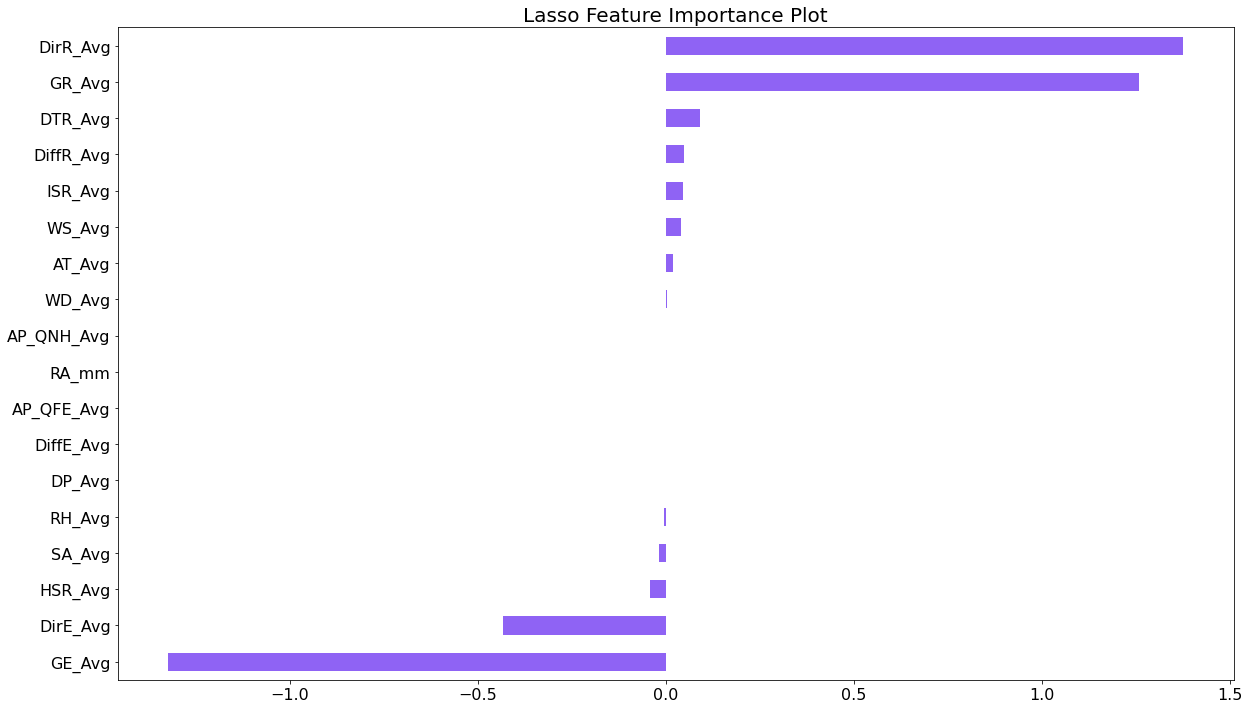

In [43]:
figsize(12, 10)
matplotlib.rcParams['font.size'] = 16

g = lasso_coeff['Feature Importance'].plot(kind='barh',figsize=(20,12), color='#8f63f4')
plt.title("Lasso Feature Importance Plot",fontsize=20)
plt.savefig(fname="Lasso_Feature_importance_plot",dpi=300)

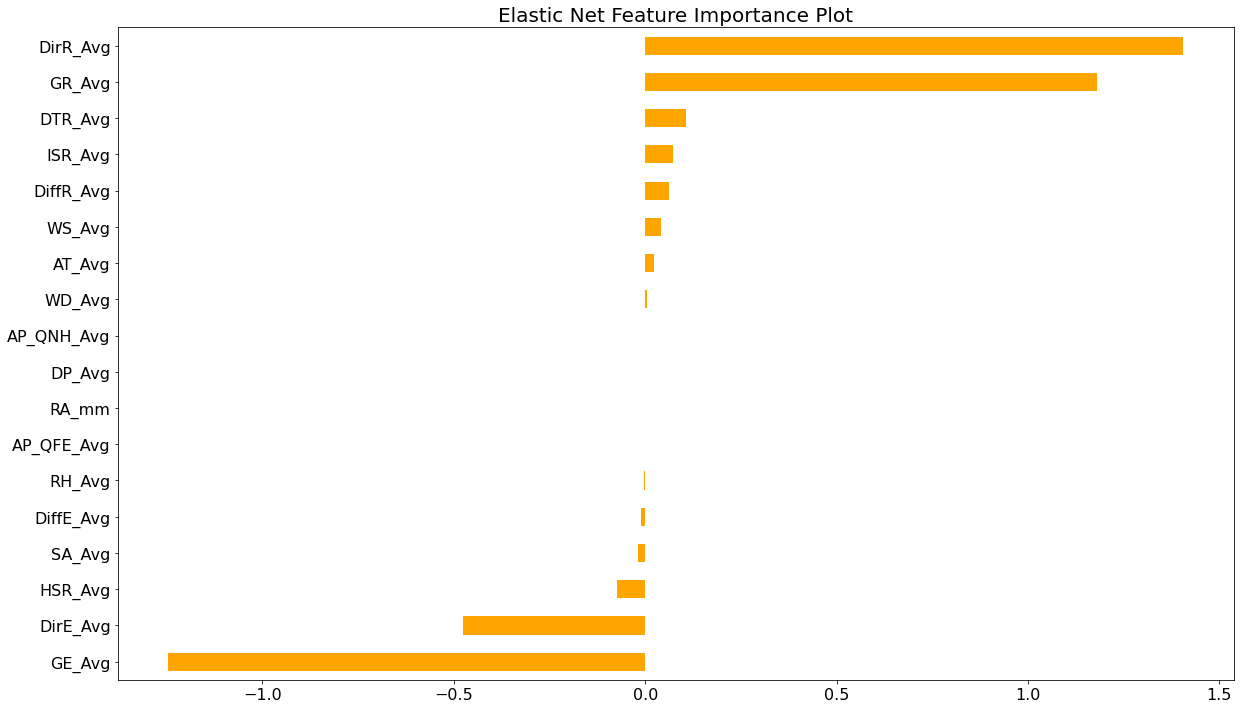

In [44]:
figsize(12, 10)
matplotlib.rcParams['font.size'] = 16

g = e_net_coeff['Feature Importance'].plot(kind='barh',figsize=(20,12), color='#FFA500')
plt.title("Elastic Net Feature Importance Plot",fontsize=20)
plt.savefig(fname="E_net_Feature_importance_plot",dpi=300)

In [45]:
column_to_drop=[]
column_to_drop+=['AP_QFE_Avg','RA_mm','DP_Avg','AP_QNH_Avg']
df=df.drop(column_to_drop,axis=1)

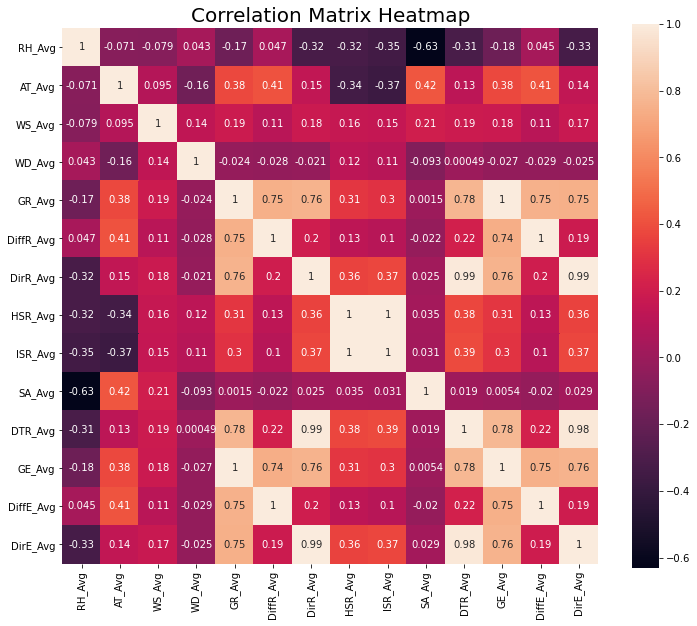

In [46]:
matplotlib.rcParams['font.size'] = 10
corr = df.iloc[:,:-1].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, square=True);
plt.title("Correlation Matrix Heatmap",fontsize=20)
plt.savefig(fname="Correlation_Matrix_Heatmap_brfore_feature_removal",dpi=300)

In [47]:
column_to_drop_2=['HSR_Avg','GE_Avg','DiffE_Avg','DirE_Avg','DTR_Avg']
df=df.drop(column_to_drop_2,axis=1)

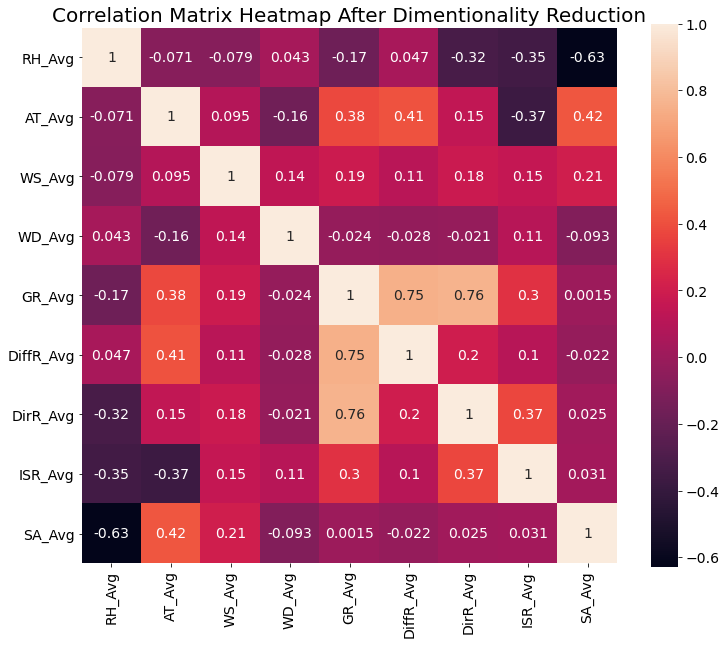

In [48]:
matplotlib.rcParams['font.size'] = 14
corr = df.iloc[:,:-1].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, square=True);
plt.title("Correlation Matrix Heatmap After Dimentionality Reduction",fontsize=20)
plt.savefig(fname="Correlation_Matrix_Heatmap_afyter_feature_removal",dpi=300)

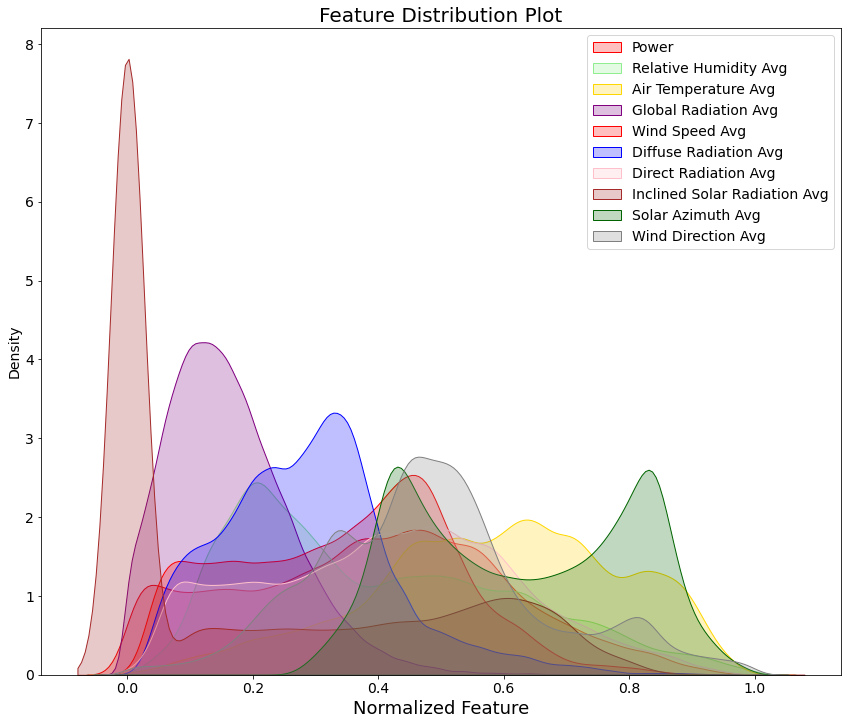

In [49]:
fig, ax = plt.subplots()
sns.kdeplot(data=df['Power'].squeeze(), ax=ax, color='red', shade=True, label='Power')
sns.kdeplot(data=df['RH_Avg'].squeeze(), ax=ax, color='lightgreen', shade=True, label='Relative Humidity Avg')
sns.kdeplot(data=df['AT_Avg'].squeeze(), ax=ax, color='gold', shade=True,label='Air Temperature Avg')
sns.kdeplot(data=df['WS_Avg'].squeeze(), ax=ax, color='purple',shade=True, label='Global Radiation Avg')
sns.kdeplot(data=df['GR_Avg'].squeeze(), ax=ax, color='red',shade=True, label='Wind Speed Avg')
sns.kdeplot(data=df['DiffR_Avg'].squeeze(), ax=ax, color='blue',shade=True, label='Diffuse Radiation Avg')
sns.kdeplot(data=df['DirR_Avg'].squeeze(), ax=ax, color='pink',shade=True, label='Direct Radiation Avg')
sns.kdeplot(data=df['ISR_Avg'].squeeze(), ax=ax, color='brown',shade=True, label='Inclined Solar Radiation Avg')
sns.kdeplot(data=df['SA_Avg'].squeeze(), ax=ax, color='darkgreen',shade=True, label='Solar Azimuth Avg')
sns.kdeplot(data=df['WD_Avg'].squeeze(), ax=ax, color='grey',shade=True, label='Wind Direction Avg')
plt.xlabel('Normalized Feature', fontsize=18)
ax.legend(bbox_to_anchor=(1, 1), loc='upper right')
plt.tight_layout()
plt.title("Feature Distribution Plot",fontsize=20)
plt.savefig(fname="F_dis_thres",dpi=300)
plt.show()